# Stylometria

Stylometria to metoda analizy pozwalająca ustalić autora lub chronologię tekstu na podstawie jego cech językowych.

#### Modules

In [1]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

#### Funkcje, przygotowanie tekstu

In [2]:
def file_into_string(filename):
    strings = []
    with open(f'data/{filename}.txt', encoding = 'utf-8') as f:
            strings.append(f.read())
    return '\n'.join(strings)

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    text_tokenized = ([token.lower() for token in tokens
                                            if any(c.isalpha() for c in token)])
    return text_tokenized

def prepare_texts(texts_list):
    text_by_author = {}
    for author, files in texts_list.items():
        x = []
        for file in files:
            x += tokenize(file_into_string(file))
        text_by_author[author] = x
    return text_by_author

def prepare_one_text(text_list, author):
    text_by_author[author] = tokenize(file_into_string(text_list[author]))
    return text_by_author[author]

# Pierwszy test: powieści fantasy

Wszystkie załadowane teksty są w języku angielskim.

Teksty:
* J.K. Rowling: Harry Potter (parts 1-7)
* C.S. Lewis: The Chronicles of Narnia (parts 1-7)
* J.R.R. Tolkien: The Lords of the Rings (parts 1-3)

Sprawdzane teksty:
* J.R.R. Tolkien: Hobbit
* J.K. Rownling: The Casual Vacancy

In [3]:
texts = {
    'Rowling': ['Harry Potter 1', 'Harry Potter 2', 'Harry Potter 3', 'Harry Potter 4', 'Harry Potter 5', 'Harry Potter 6', 'Harry Potter 7'],
    'Lewis': ['Narnia 1','Narnia 2','Narnia 3','Narnia 4','Narnia 5','Narnia 6','Narnia 7'],
    'Tolkien': ['LOTR 1', 'LOTR 2', 'LOTR 3'],
    'TestCase': ['Hobbit']
}

In [4]:
text_by_author = prepare_texts(texts)

## Test #1.1: J.R.R. Tolkien "Hobbit"

### Metoda rozkładu chi kwadrat

Metoda zaproponowana przez Adama Kilgarriffa. Polega na zmierzeniu "dystansu" pomiędzy zestawem słów sprawdzanego tekstu z tekstem sprawdzanego autora. Im bardziej podobne są do siebie oba zestawy, tym większa szansa, że teksty mają wspólnego autora.

In [5]:
def chisquare_text(words_by_author, test):
    chisquared_by_author = dict()
    for author in words_by_author:
        if author != test:
            combined_corpus = (text_by_author[author] + text_by_author[test])
            author_proportion = (len(text_by_author[author])/ len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0
            for word, combined_count in most_common_words:
                observed_count_author = text_by_author[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author - expected_count_author)**2 / expected_count_author)
                chisquared_by_author[author] = chisquared
            print('Chi-squared for {} = {:.1f}'.format(author, chisquared))
    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

In [6]:
chisquare_text(texts,'TestCase')

Chi-squared for Rowling = 1262.4
Chi-squared for Lewis = 1908.1
Chi-squared for Tolkien = 1028.1
Most-likely author by vocabulary is Tolkien



W tym wypadku metoda chi kwadrat dobrze wskazała na autora.

### Współczynnik podobieństwa Jaccarda

Współczynnik podobieństwa Jaccarda mierzy podobieństwo między dwoma zbiorami. W ten sposób sprawdza się, jak bardzo pokrywa się sprawdzany tekst z tekstami sprawdzanego autora. Im większe podobieństwo, tym większe prawdopodobieństwo, że teksty mają wspólnego autora.

In [7]:
def jaccard_test(words_by_author, test):
    jaccard_by_author = dict()
    unique_words_unknown = set(text_by_author[test])
    authors = (words_by_author.keys())
    (author for author in words_by_author if author != test)
    for author in authors:
        if author != test:
            unique_words_author = set(text_by_author[author])
            shared_words = unique_words_author.intersection(unique_words_unknown)
            jaccard_sim = (float(len(shared_words))/ (len(unique_words_author) + len(unique_words_unknown) - len(shared_words)))
            jaccard_by_author[author] = jaccard_sim
            print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))
    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))

In [8]:
jaccard_test(texts, 'TestCase')

Jaccard Similarity for Rowling = 0.09417567823942326
Jaccard Similarity for Lewis = 0.19784679089026916
Jaccard Similarity for Tolkien = 0.16104537113206352
Most-likely author by similarity is Lewis


W tym wypadku metoda Jaccarda błędnie wskazała na C.S. Lewisa.

## Test #2: J.K. Rownling "The Casual Vacancy"

In [9]:
texts['TestCase'] = 'The_Casual_Vacancy'

In [10]:
prepare_one_text(texts, 'TestCase')

['j.k.',
 'rowling',
 'the',
 'casual',
 'vacancy',
 'to',
 'neil',
 'part',
 'one',
 'êàðòèíêà',
 '_1.jpg',
 'a',
 'casual',
 'vacancy',
 'is',
 'deemed',
 'to',
 'have',
 'occurred',
 'a',
 'when',
 'a',
 'local',
 'councillor',
 'fails',
 'to',
 'make',
 'his',
 'declaration',
 'of',
 'acceptance',
 'of',
 'office',
 'within',
 'the',
 'proper',
 'time',
 'or',
 'b',
 'when',
 'his',
 'notice',
 'of',
 'resignation',
 'is',
 'received',
 'or',
 'c',
 'on',
 'the',
 'day',
 'of',
 'his',
 'death…charles',
 'arnold-bakerlocal',
 'council',
 'administration',
 'seventh',
 'edition',
 'sunday',
 'barry',
 'fairbrother',
 'did',
 'not',
 'want',
 'to',
 'go',
 'out',
 'to',
 'dinner',
 'he',
 'had',
 'endured',
 'a',
 'thumping',
 'headache',
 'for',
 'most',
 'of',
 'the',
 'weekend',
 'and',
 'was',
 'struggling',
 'to',
 'make',
 'a',
 'deadline',
 'for',
 'the',
 'local',
 'newspaper',
 'however',
 'his',
 'wife',
 'had',
 'been',
 'a',
 'little',
 'stiff',
 'and',
 'uncommunicative'

In [11]:
chisquare_text(texts,'TestCase')

Chi-squared for Rowling = 11073.4
Chi-squared for Lewis = 20672.3
Chi-squared for Tolkien = 23612.7
Most-likely author by vocabulary is Rowling



In [12]:
jaccard_test(texts, 'TestCase')

Jaccard Similarity for Rowling = 0.28719802044670184
Jaccard Similarity for Lewis = 0.2688855269793243
Jaccard Similarity for Tolkien = 0.24415317399126188
Most-likely author by similarity is Rowling


Obie metody poprawnie wskazały J.K. Rowling.

# Różne przypadki

W tej części postanowiłam pobawić się obiema metodami, sprawdzając, jak się zachowają w różnych przypadkach.

## Test #2.1: Część załadowanego zbioru

Sprawdzany tekst
* J.K. Rowling: Harry Potter (part 1)

Ten test polega na sprawdzeniu, jak zachowa się program, gdy wrzuci mu się do sprawdzenia tekst, który został wcześniej załadowany jako część zbioru tekstów jednego z autorów.

In [13]:
texts['TestCase'] = 'Harry Potter 1'
prepare_one_text(texts, 'TestCase')

['the',
 'boy',
 'who',
 'lived',
 'mr.',
 'and',
 'mrs.',
 'dursley',
 'of',
 'number',
 'four',
 'privet',
 'drive',
 'were',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 'thank',
 'you',
 'very',
 'much',
 'they',
 'were',
 'the',
 'last',
 'people',
 'you',
 'd',
 'expect',
 'to',
 'be',
 'involved',
 'in',
 'anything',
 'strange',
 'or',
 'mysterious',
 'because',
 'they',
 'just',
 'didn',
 't',
 'hold',
 'with',
 'such',
 'nonsense',
 'mr.',
 'dursley',
 'was',
 'the',
 'director',
 'of',
 'a',
 'firm',
 'called',
 'grunnings',
 'which',
 'made',
 'drills',
 'he',
 'was',
 'a',
 'big',
 'beefy',
 'man',
 'with',
 'hardly',
 'any',
 'neck',
 'although',
 'he',
 'did',
 'have',
 'a',
 'very',
 'large',
 'mustache',
 'mrs.',
 'dursley',
 'was',
 'thin',
 'and',
 'blonde',
 'and',
 'had',
 'nearly',
 'twice',
 'the',
 'usual',
 'amount',
 'of',
 'neck',
 'which',
 'came',
 'in',
 'very',
 'useful',
 'as',
 'she',
 'spent',
 'so',
 'much',
 'of',
 'he

In [14]:
chisquare_text(texts,'TestCase')

Chi-squared for Rowling = 854.8
Chi-squared for Lewis = 11372.3
Chi-squared for Tolkien = 11925.0
Most-likely author by vocabulary is Rowling



In [15]:
jaccard_test(texts, 'TestCase')

Jaccard Similarity for Rowling = 0.24121878967414304
Jaccard Similarity for Lewis = 0.2731283803017364
Jaccard Similarity for Tolkien = 0.2133065864259445
Most-likely author by similarity is Lewis


Metoda rozkładu chi kwadrat ze sporym prawdopodobieństwem wskazała na J.K. Rowling. Jednak metoda Jaccarda przypisała autorstwo C.S. Lewisowi, czy to znaczy, że C.S. Lewis ma najbardziej uniwersalny zestaw słów?

## Test #2.2: Załadowanie całości zbioru autora

Do tego testu dodatkowo zostały załadowane teksty:
* Luo Guanzhong: Romance of the Three Kingdoms
* Wu Cheng'en: Journey to the West

Sprawdzany tekst:
* Luo Guanzhong: Romance of the Three Kingdoms

Ten test polega na sprawdzeniu, jak zachowa się program, gdy tekst do sprawdzenia jest identyczny jak tekst, który został przypisany jako jedyny jednemu z autorów. 

In [16]:
texts['Luo'] = 'Three Kingdoms en'
prepare_one_text(texts, 'Luo')

texts['Wu'] = 'Journey to the West en'
prepare_one_text(texts, 'Wu')

texts['TestCase'] = 'Three Kingdoms en'
prepare_one_text(texts, 'TestCase')

['three',
 'heroes',
 'swear',
 'brotherhood',
 'in',
 'the',
 'peach',
 'garden',
 'one',
 'victory',
 'shatters',
 'the',
 'rebels',
 'in',
 'battlegrounds',
 'domains',
 'under',
 'heaven',
 'after',
 'a',
 'long',
 'period',
 'of',
 'division',
 'tends',
 'to',
 'unite',
 'after',
 'a',
 'long',
 'period',
 'of',
 'union',
 'tends',
 'to',
 'divide',
 'this',
 'has',
 'been',
 'so',
 'since',
 'antiquity',
 'when',
 'the',
 'rule',
 'of',
 'the',
 'zhou',
 'dynasty',
 'weakened',
 'seven',
 'contending',
 'kingdoms',
 'sprang',
 'up',
 'warring',
 'one',
 'with',
 'another',
 'until',
 'the',
 'kingdom',
 'of',
 'qin',
 'prevailed',
 'and',
 'possessed',
 'the',
 'empire',
 'but',
 'when',
 'qin',
 "'s",
 'destiny',
 'had',
 'been',
 'fulfilled',
 'arose',
 'two',
 'opposing',
 'kingdoms',
 'chu',
 'and',
 'han',
 'to',
 'fight',
 'for',
 'the',
 'mastery',
 'and',
 'han',
 'was',
 'the',
 'victor',
 'the',
 'rise',
 'of',
 'the',
 'fortunes',
 'of',
 'han',
 'began',
 'when',
 'li

In [17]:
chisquare_text(texts,'TestCase')

Chi-squared for Rowling = 105144.8
Chi-squared for Lewis = 84049.1
Chi-squared for Tolkien = 79765.0
Chi-squared for Luo = 0.0
Chi-squared for Wu = 78911.5
Most-likely author by vocabulary is Luo



In [18]:
jaccard_test(texts, 'TestCase')

Jaccard Similarity for Rowling = 0.267378181591885
Jaccard Similarity for Lewis = 0.2965714004623936
Jaccard Similarity for Tolkien = 0.30398413245946876
Jaccard Similarity for Luo = 1.0
Jaccard Similarity for Wu = 0.3565579212960914
Most-likely author by similarity is Luo


W obu przypadkach program wykazał, że autorem jest Luo Guanzhong. Wskazując na prawdopodobieństwo 0.0 w metodzie chi kwadrat, a 1.0 w indeksie Jaccarda. Słusznie, ponieważ sprawdzany tekst i tekst przypisany Luo Guanzhongowi były tymi samymi plikami.

## Test #2.3: Inne pismo

### Test #2.3.1: Alfabet łaciński i pismo chińskie

W tej części zostanie sprawdzone, jak program zareaguje, gdy zostanną załadowane do niego teksty napisane innym pismem (w tym wypadku chińskim).

Zmiany:
* Wu Cheng'en: Journey to the West (wersja angielska zmieniona na wersję chińską)

Sprawdzany tekst:
* Luo Guanzhong: Romance of the Three Kingdoms - w dalszym ciągu, wersja angielska

Sprawdzany tekst jest napisany po angielsku, jednak został wgrany jeden tekst napisany w całości pismem chińskim.

In [19]:
texts['Wu'] = 'Journey to the West ch'
prepare_one_text(texts, 'Wu')

['第一回',
 '靈根育孕源流出',
 '心性修持大道生',
 '詩曰：',
 '混沌未分天地亂，茫茫渺渺無人見。',
 '自從盤古破鴻濛，開闢從茲清濁辨。',
 '覆載群生仰至仁，發明萬物皆成善。',
 '欲知造化會元功，須看西遊釋厄傳。',
 '蓋聞天地之數，有十二萬九千六百歲為一元。將一元分為十二會，乃子、丑、寅',
 '、卯、辰、巳、午、未、申、酉、戌、亥之十二支也。每會該一萬八百歲。且就',
 '一日而論：子時得陽氣，而丑則雞鳴﹔寅不通光，而卯則日出﹔辰時食後，而巳',
 '則挨排﹔日午天中，而未則西蹉﹔申時晡，而日落酉，戌黃昏，而人定亥。譬於',
 '大數，若到戌會之終，則天地昏曚而萬物否矣。再去五千四百歲，交亥會之初，',
 '則當黑暗，而兩間人物俱無矣，故曰混沌。又五千四百歲，亥會將終，貞下起元',
 '，近子之會，而復逐漸開明。邵康節曰：：「冬至子之半，天心無改移。一陽初',
 '動處，萬物未生時。」到此，天始有根。再五千四百歲，正當子會，輕清上騰，',
 '有日，有月，有星，有辰。日、月、星、辰，謂之四象。故曰，天開於子。又經',
 '五千四百歲，子會將終，近丑之會，而逐漸堅實。《易》曰：「大哉乾元！至哉',
 '坤元！萬物資生，乃順承天。」至此，地始凝結。再五千四百歲，正當丑會，重',
 '濁下凝，有水，有火，有山，有石，有土。水、火、山、石、土，謂之五形。故',
 '曰，地闢於丑。又經五千四百歲，丑會終而寅會之初，發生萬物。曆曰：「天氣',
 '下降，地氣上升﹔天地交合，群物皆生。」至此，天清地爽，陰陽交合。再五千',
 '四百歲，子會將終，近丑之會，而逐漸堅實。《易》曰：「大哉乾元！至哉坤元',
 '！萬物資生，乃順承天。」至此，地始凝結。再五千四百歲，正當丑會，重濁下',
 '凝，有水，有火，有山，有石，有土。水、火、山、石、土，謂之五形。故曰，',
 '地闢於丑。又經五千四百歲，丑會終而寅會之初，發生萬物。曆曰：「天氣下降',
 '，地氣上升﹔天地交合，群物皆生。」至此，天清地爽，陰陽交合。再五千四百',
 '歲，正當寅會，生人，生獸，生禽，正謂天地人，三才定位。故曰，人生於寅。',
 '感盤古開闢，三皇治世，五帝定倫，世界之間，遂分為四大部洲：曰東勝神洲，',
 '曰西牛賀洲，曰南贍部洲，曰北俱蘆洲。這部書單表東勝神洲。海外有一國土

In [20]:
chisquare_text(texts,'TestCase')

Chi-squared for Rowling = 105144.8
Chi-squared for Lewis = 84049.1
Chi-squared for Tolkien = 79765.0
Chi-squared for Luo = 0.0
Chi-squared for Wu = 19723.1
Most-likely author by vocabulary is Luo



In [21]:
jaccard_test(texts, 'TestCase')

Jaccard Similarity for Rowling = 0.267378181591885
Jaccard Similarity for Lewis = 0.2965714004623936
Jaccard Similarity for Tolkien = 0.30398413245946876
Jaccard Similarity for Luo = 1.0
Jaccard Similarity for Wu = 0.0
Most-likely author by similarity is Luo


W metodzie chi kwadrat program wskazał pewne prawdopodobieństwo, jednak w indeksie Jaccarda wyniosło ono 0.0.

### Test 2.3.2: Dwa teksty napisane pismem chińskim

Sprawdzany tekst
* Luo Guanzhong: Romance of the Three Kingdoms (wersja angielska zmieniona na wersję chińską)

Tym razem sprawdzany tekst został zmieniony na wersję chińską poprzednio sprawdzanej powieści. Co oznacza, że w zbiorze mamy dwa teksty napisane pismem chińskim: jeden to sprawdzana powieść, drugi jest tekstem przypisanym jednemu z autorów.

In [22]:
texts['TestCase'] = 'Three Kingdoms ch'
prepare_one_text(texts, 'TestCase')

['第一回：宴桃園豪傑三結義，斬黃巾英雄首立功',
 '詞曰：',
 '滾滾長江東逝水，浪花淘盡英雄。是非成敗轉頭空：青山依舊在，幾度夕陽紅。白',
 '髮漁樵江渚上，慣看秋月春風。一壺濁酒喜相逢：古今多少事，都付笑談中。',
 '話說天下大勢，分久必合，合久必分：周末七國分爭，并入於秦。及秦滅之後，楚',
 '、漢分爭，又并入於漢。漢朝自高祖斬白蛇而起義，一統天下。後來光武中興，傳至獻',
 '帝，遂分為三國。推其致亂之由，殆始於桓、靈二帝。桓帝禁錮善類，崇信宦官。及桓',
 '帝崩，靈帝即位，大將軍竇武、太傅陳蕃，共相輔佐。時有宦官曹節等弄權，竇武、陳',
 '蕃謀誅之，作事不密，反為所害。中涓自此愈橫。',
 '建寧二年四月望日，帝御溫德殿。方陞座，殿角狂風驟起，只見一條大青蛇，從梁',
 '上飛將下來，蟠於椅上。帝驚倒，左右急救入宮，百官俱奔避。須臾，蛇不見了。忽然',
 '大雷大雨，加以冰雹，落到半夜方止，壞卻房屋無數。建寧四年二月，洛陽地震；又海',
 '水泛溢，沿海居民，盡被大浪捲入海中。光和元年，雌雞化雄。六月朔，黑氣十餘丈，',
 '飛入溫德殿中。秋七月，有虹見於玉堂；五原山岸，盡皆崩裂。種種不祥，非止一端。',
 '帝下詔問群臣以災異之由，議郎蔡邕上疏，以為蜺墮雞化，乃婦寺干政之所致，言',
 '頗切直。帝覽奏歎息，因起更衣。曹節在後竊視，悉宣告左右。遂以他事陷邕於罪，放',
 '歸田里。後張讓，趙忠，封諝，段珪，曹節，候覽，蹇碩，程曠，夏惲，郭勝十人朋比',
 '為奸，號為「十常侍」。帝尊信張讓，呼為「阿父」，朝政日非，以致天下人心思亂，',
 '盜賊蜂起。',
 '時鉅鹿郡有兄弟三人：一名張角，一名張寶，一名張梁。那張角本是個不第秀才。',
 '因入山採藥，遇一老人，碧眼童顏，手執藜杖，喚角至一洞中，以天書三卷授之，曰：',
 '「此名太平要術。汝得之，當代天宣化，普救世人；若萌異心，必獲惡報。」角拜問姓',
 '名。老人曰：「吾乃南華老仙也。」言訖，化陣清風而去。',
 '角得此書，曉夜攻習，能呼風喚雨，號為太平道人。中平元年正月內，疫氣流行，',
 '張角散施符水，為人治病，自稱大賢良師。角有徒弟五百餘人，雲游四方，皆能書符念',
 '咒。次後徒眾日多，角乃立三十六方，─大方萬餘人，小方六七千─，各立渠帥，稱為',
 '將軍。訛言「蒼天已

In [23]:
chisquare_text(texts,'TestCase')

Chi-squared for Rowling = 222.1
Chi-squared for Lewis = 803.5
Chi-squared for Tolkien = 543.2
Chi-squared for Luo = 438.2
Chi-squared for Wu = 388.1
Most-likely author by vocabulary is Rowling



In [24]:
jaccard_test(texts, 'TestCase')

Jaccard Similarity for Rowling = 0.0
Jaccard Similarity for Lewis = 0.0
Jaccard Similarity for Tolkien = 0.0
Jaccard Similarity for Luo = 0.0
Jaccard Similarity for Wu = 0.0004272794170009732
Most-likely author by similarity is Wu


W metodzie chi kwadrat program przypisał autorstwo J.K. Rowling, co jest dość niespodziewane. Z kolei w indeksie Jaccarda wszystkie teksty poza jednym, jedynym poza sprawdzanym tekście napisanym w języku chińskim, zostało przypisane zerowe prawdopodobieństwo.

# Teksty zachodnie i wschodnie

W tej części chciałam porównać teksty napisane na Zachodzie (Europa, USA) oraz na Wschodzie (Chiny, Japonia). Czy dla programu będą się różnić w jakiś sposób i czy program bedzie na podstawie przykładów rozpoznać z jakiego kręgu kulturowego pochodzi tekst?
Teksty azjatyckie załączone są w wersji przetłumaczonej na język angielski. Zbiory składają się z powieści napisanych współcześnie oraz klasyków, które zostały współcześnie przetłumaczone.
    
Załadowane teksty:

**Zachód**
* J.K. Rowling: Harry Potter (parts 1, 3, 7)
* C.S. Lewis: The Chronicles of Narnia (parts 1, 3, 7)'
* J.R.R. Tolkien: The Lord of the Rings (parts 1-3)
* Niccolò Machiavelli: The Prince
* Margaret Atwood: The Handmaid's Tale
* Fiodor Dostojewski: Crime and Punishment
* Jane Austen: Pride and Prejudice
* Herman Melville: Moby Dick
* Victor Hugo: Les Miserables
* Eco Umberto: The Name of the Rose

**Wschód**
* Luo Guanzhong: Romance of the Three Kingdoms
* Wu Cheng'en: Journey to the West
* Sun Zi: Art of War
* Murasaki Shikibu: Genji Monogatari
* Dazai Osamu: No Longer Human
* Natsume Souseki: Kokoro
* Cao Xueqin: Dream of the Red Chamber
* Pu Songling: Strange Stories from Chinese Studio

W miarę możliwości teksty odpowiadają sobie tematycznie.

In [25]:
west_east = {
    'West': ['Harry Potter 1', 'Harry Potter 3', 'Harry Potter 7', 'Narnia 1', 'Narnia 3', 'Narnia 7', 'LOTR 1', 'LOTR 2', 'LOTR 3', 'The Prince', 'Margaret Atwood - The Handmaids Tale', 'Crime and Punishment', 'Pride and Prejudice', 'Moby Dick','Les Miserables', 'Eco Umberto - The Name Of The Rose'],
    'East': ['Three Kingdoms en','Journey to the West en', 'Art of War', 'Genji Monogatari', 'No Longer Human', 'Kokoro', 'The dream of red chamber', 'Strange Stories'],
    'TestCase': ['Murakami - The elephant vanishes']
}

In [26]:
text_by_author = prepare_texts(west_east)

In [27]:
print("Zachód:", len(text_by_author['West']))
print("Wschód:", len(text_by_author['East']))

Zachód: 2345976
Wschód: 2299908


### Test 3.1: Haruki Murakami "The elephant vanishes"

In [28]:
chisquare_text(west_east,'TestCase')

Chi-squared for West = 1381.0
Chi-squared for East = 1449.4
Most-likely author by vocabulary is West



In [29]:
jaccard_test(west_east, 'TestCase')

Jaccard Similarity for West = 0.11069424671300561
Jaccard Similarity for East = 0.15406794534286072
Most-likely author by similarity is East


### Test 3.2: Edgar Allan Poe "The Fall of the House of Usher"

In [30]:
west_east['TestCase'] = 'Edgar Allan Poe - The Fall of the House of Usher'
prepare_one_text(west_east, 'TestCase')
chisquare_text(west_east,'TestCase')
jaccard_test(west_east, 'TestCase')

Chi-squared for West = 13.0
Chi-squared for East = 15.2
Most-likely author by vocabulary is West

Jaccard Similarity for West = 0.03220706011755405
Jaccard Similarity for East = 0.047425938117182355
Most-likely author by similarity is East


### Test 3.3: Musashi Miyamoto "The Book of Five Rings"

In [31]:
west_east['TestCase'] = 'Five Rings'
prepare_one_text(west_east, 'TestCase')
chisquare_text(west_east,'TestCase')
jaccard_test(west_east, 'TestCase')

Chi-squared for West = 351.8
Chi-squared for East = 252.3
Most-likely author by vocabulary is East

Jaccard Similarity for West = 0.037490790082418055
Jaccard Similarity for East = 0.05724038335302613
Most-likely author by similarity is East


### Test 3.4: Charlotte Perkins Gilman "The Yellow Wallpaper"

In [32]:
west_east['TestCase'] = 'The-Yellow-Wallpaper'
prepare_one_text(west_east, 'TestCase')
chisquare_text(west_east,'TestCase')
jaccard_test(west_east, 'TestCase')

Chi-squared for West = 22.4
Chi-squared for East = 29.7
Most-likely author by vocabulary is West

Jaccard Similarity for West = 0.027679521961605825
Jaccard Similarity for East = 0.04066280904786954
Most-likely author by similarity is East


Jak widać na powyższych przykładach, test chi kwadrat za każdym razem dobrze wskazuje, z jakiego kręgu kulturowego pochodzi tekst. Jednakże indeks Jaccarda za każdym razem wskazuje na wschód.
(Nie mam pojęcia, dlaczego tak się dzieje.)

## Testy kompozycji

Porównanie tekstów z zachodniego i wschodniego kręgu kulturowego na podstawie ich kompozycji i słownictwa.

In [33]:
west_east = {
    'Wschód': ['Three Kingdoms en','Journey to the West en', 'Art of War', 'Genji Monogatari', 'No Longer Human', 'Kokoro', 'The dream of red chamber', 'Strange Stories'],
    'Zachód': ['Harry Potter 1', 'Harry Potter 3', 'Harry Potter 7', 'Narnia 1', 'Narnia 3', 'Narnia 7', 'LOTR 1', 'LOTR 2', 'LOTR 3', 'The Prince', 'Margaret Atwood - The Handmaids Tale', 'Crime and Punishment', 'Pride and Prejudice', 'Moby Dick','Les Miserables', 'Eco Umberto - The Name Of The Rose'],
}

In [34]:
text_by_author = prepare_texts(west_east)

### Długość słów

In [35]:
def tokens_length_plot(texts_list):
    texts_length = prepare_texts(west_east)
    for author in texts_list:
        token_lengths = [len(token) for token in texts_length[author]]
        texts_length[author] = nltk.FreqDist(token_lengths)
        texts_length[author].plot(15,title="Długość słów: " + author)

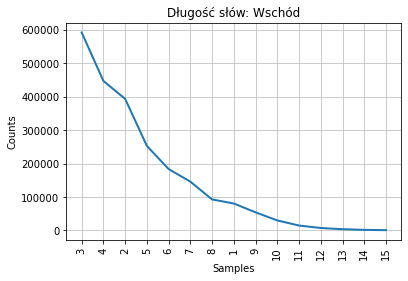

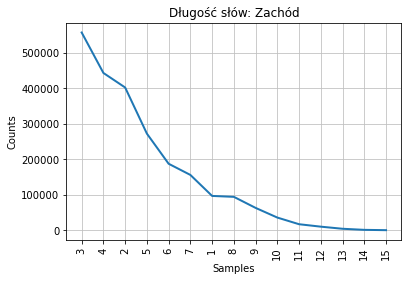

In [36]:
tokens_length_plot(west_east.keys())

W obu przypadkach rozłożenie długości słów jest podobne.

### Słowa ze stop listy

In [37]:
def stopwords_test(words_by_author):
    stopwords_by_author_freq_dist = dict()
    plt.figure(2)
    stop_words = set(stopwords.words('english')) # Use set for speed.
    print('Number of stopwords = {}\n'.format(len(stop_words)))
#    print('Stopwords = {}\n'.format(stop_words))

    for author in words_by_author:
        stopwords_by_author = [word for word in text_by_author[author] if word in stop_words]
        stopwords_by_author_freq_dist[author] = nltk.FreqDist(stopwords_by_author)
        stopwords_by_author_freq_dist[author].plot(30,label=author, title= '30 najczęstszych słów ze stop listy: '+author.capitalize())
    plt.show() # Uncomment to see plot while coding function.

Number of stopwords = 179



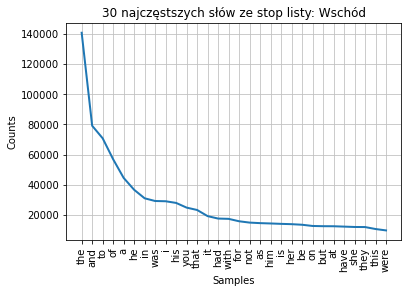

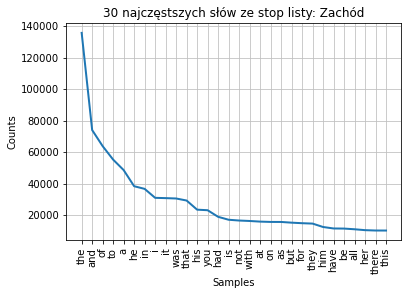

In [38]:
stopwords_test(west_east.keys())

Teksty nie różnią się znacznie pod względem najczęściej występujących słów ze stop listy. 

### Najczęstsze słowa

In [39]:
def most_common_words(texts_list):
    by_author_most_common = dict()
    stop_words = set(stopwords.words('english'))
    plt.figure(3)
    for author in texts_list:
        stopwords_by_author = [word for word in text_by_author[author] if word not in stop_words]
        by_author_most_common[author] = nltk.FreqDist(stopwords_by_author)
        by_author_most_common[author].plot(35,label=author, title='35 najczęstszych słów: '+author.capitalize())
        plt.show()

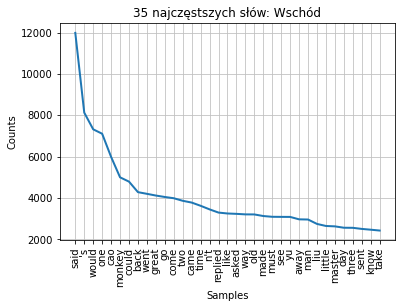

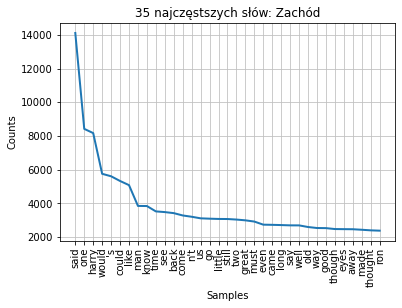

In [40]:
most_common_words(west_east.keys())

Większość załadowanych tekstów to powieści fabularne, w związku z tym w obu przypadkach najczęstszym słowem jest "said". Reszta słów różni się zależnie od tematyki tekstów. W tekstach wschodnich częściej pojawiają się imiona bohaterów, prawdopodobnie ze względu na długości tekstów.

### Najczęstsze części mowy

In [41]:
def parts_of_speech_test(texts_list):
    by_author_pos_freq_dist = dict()
    plt.figure(3)
    for author in texts_list:
        pos_by_author = [pos[1] for pos in nltk.pos_tag(text_by_author[author])]
        by_author_pos_freq_dist[author] = nltk.FreqDist(pos_by_author)
        by_author_pos_freq_dist[author].plot(35,label=author, title='Najczęstsze części mowy: '+author.capitalize())
        plt.show()

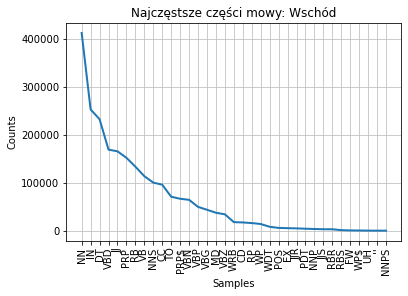

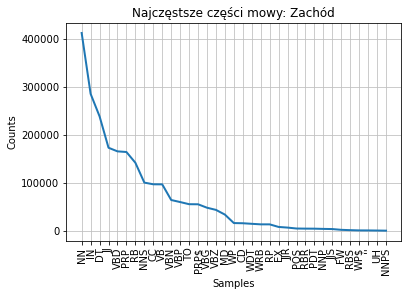

In [42]:
parts_of_speech_test(west_east.keys())

### Konkluzja

Teksty napisane przez autorów zachodnich i wschodnich nie różnią się mocno od siebie pod względem kompozycyjnym. Jednakże badania zostały przeprowadzone na niewielkim zbiorze, co mogło znacznie wpłynać na wyniki.